<a href="https://colab.research.google.com/github/alinka770/analyzePoliceData/blob/main/9_11_21_DataPolice_lastversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
from random import randint
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

SVM - chi square
mutual information, information gain

WEKA - посмотреть там
https://www.weka.io/
https://www.cs.waikato.ac.nz/ml/weka/
https://machinelearningmastery.com/feature-selection-with-categorical-data/

Попробовать другие модели SVM, нейронная сеть сonditional(crf, rnn, ann)


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
def random_genders(size, p=None):
    if not p:
        p = (0.57, 0.43)
    gender = ("Male", "Female")
    return np.random.choice(gender, size=size, p=p)
def random_religation(size, p=None):
    if not p:
        p = (0.77, 0.23)
    rel = ("Jew", "Muslim")
    return np.random.choice(rel, size=size, p=p)

def random_type(size, p=None):
    if not p:
        p = (0.49, 0.49, 0.02)
    type = ("פרטי", "מחסרי", "משאית", "דו/תלת גלגלי", "טנדר", "מונית", "ציבורי", "טרקטרון", "טרקטור")
    return np.random.choice(type, size=size, p=p)

def random_age(size, p=None):
    if not p:
        p = (0.49, 0.49, 0.02)
    age = ("0-18", "19-24", "25-34", "35-44", "44-54", "55-64", "65-74", "74+")
    return np.random.choice(age, size=size, p=p)

In [4]:
def generatePassport(number):
    count = 0
    list = []
    while count < number:
        list.append(''.join(["{}".format(randint(0, 9)) for num in range(0, 7)]))
        count = count + 1
    return list

In [6]:
sizePrivate1 = 103119  
sizeTruck1 = 1546  
sizeMoto1 = 6332

sizePrivate2 = 547758  
sizeTruck2 = 43925  
sizeMoto2 = 43705
sizeTaxi = 756
sizeBus = 1063
sizeTractor = 1067

sizePrivate3 = 1005305 
sizeTruck3 = 96630 
sizeMoto3 = 116762
sizeTaxi3 = 8777
sizeBus1 = 9873
sizeTractor1 = 7653

sizePrivate4 = 973423
sizeTruck4 = 108458
sizeMoto4 = 153664
sizeTaxi4 = 19478
sizeBus2 = 14321
sizeTractor2 = 9380

sizePrivate5 =794911
sizeTruck5 = 101371
sizeMoto5 = 142298
sizeTaxi5 = 28226
sizeBus3 = 19535
sizeTractor3 = 11974

sizePrivate6 =574845
sizeTruck6 = 85622
sizeMoto6 = 74952
sizeTaxi6 = 26542
sizeBus4 = 18455
sizeTractor4 = 8760

sizePrivate7 =443256
sizeTruck7 = 60786
sizeMoto7 = 55450
sizeTaxi7 = 22384
sizeBus5 = 12826
sizeTractor5 = 5959

sizePrivate8 =168959
sizeTruck8 = 17108
sizeMoto8 = 28725
sizeTaxi8 = 6513
sizeBus6 = 3640
sizeTractor6 = 1595
#0-18
df = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation' ])
df['Gender'] = random_genders(sizePrivate1)
df['Type transport'] = 'private'
df['Age']='0-18'
df['Religation'] = random_religation(sizePrivate1, (0.7, 0.3))

df1 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df1['Gender'] = random_genders(sizeTruck1, (0.98, 0.02))
df1['Type transport'] = 'truck'
df1['Age']='0-18'
df1['Religation'] = random_religation(sizeTruck1, (0.22, 0.78))

df2 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df2['Gender'] = random_genders(sizeMoto1, (0.96, 0.04))
df2['Type transport'] = 'Two / three wheels'
df2['Age']='0-18'
df2['Religation'] = random_religation(sizeMoto1, (0.69, 0.31))

#19-24
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate2, (0.55, 0.45))
df3['Type transport'] = 'private'
df3['Age']='19-24'
df3['Religation'] = random_religation(sizePrivate2, (0.68, 0.32))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck2, (0.96, 0.04))
df4['Type transport'] = 'truck'
df4['Age']='19-24'
df4['Religation'] = random_religation(sizeTruck2, (0.37, 0.63))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto2, (0.94, 0.06))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='19-24'
df5['Religation'] = random_religation(sizeMoto2, (0.71, 0.29))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi, (0.99, 0.01))
df6['Type transport'] = 'Taxi'
df6['Age']='19-24'
df6['Religation']=random_religation(sizeTaxi, (0.27, 0.73))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus, (0.99, 0.01))
df7['Type transport'] = 'Bus'
df7['Age']='19-24'
df7['Religation'] = random_religation(sizeBus, (0.13, 0.87))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor, (1, 0))
df8['Type transport'] = 'Tractor'
df8['Age']='19-24'
df8['Religation'] = random_religation(sizeTractor, (0.15, 0.85))
df = df.append(df1.append(df2.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))))
#25-34
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate3, (0.54, 0.46))
df3['Type transport'] = 'private'
df3['Age']='25-34'
df3['Religation'] = random_religation(sizePrivate3, (0.72, 0.28))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck3, (0.96, 0.04))
df4['Type transport'] = 'truck'
df4['Age']='25-34'
df4['Religation'] = random_religation(sizeTruck3, (0.47, 0.53))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto3, (0.9, 0.1))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='25-34'
df5['Religation'] = random_religation(sizeMoto3, (0.81, 0.19))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi3, (0.987, 0.013))
df6['Type transport'] = 'Taxi'
df6['Age']='25-34'
df6['Religation']=random_religation(sizeTaxi3, (0.41, 0.59))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus1, (0.99, 0.01))
df7['Type transport'] = 'Bus'
df7['Age']='25-34'
df7['Religation'] = random_religation(sizeBus1, (0.24, 0.76))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor1, (0.9994, 0.0006))
df8['Type transport'] = 'Tractor'
df8['Age']='25-34'
df8['Religation'] = random_religation(sizeTractor1, (0.25, 0.75))

df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
#35-44
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate4, (0.53, 0.47))
df3['Type transport'] = 'private'
df3['Age']='35-44'
df3['Religation'] = random_religation(sizePrivate4, (0.77, 0.23))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck4, (0.97, 0.03))
df4['Type transport'] = 'truck'
df4['Age']='35-44'
df4['Religation'] = random_religation(sizeTruck4, (0.55, 0.45))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto4, (0.86, 0.14))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='35-44'
df5['Religation'] = random_religation(sizeMoto4, (0.89, 0.11))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi4, (0.982, 0.018))
df6['Type transport'] = 'Taxi'
df6['Age']='35-44'
df6['Religation']=random_religation(sizeTaxi4, (0.6, 0.4))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus2, (0.987, 0.013))
df7['Type transport'] = 'Bus'
df7['Age']='35-44'
df7['Religation'] = random_religation(sizeBus2, (0.4, 0.6))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor2, (0.9988, 0.0012))
df8['Type transport'] = 'Tractor'
df8['Age']='35-44'
df8['Religation'] = random_religation(sizeTractor2, (0.37, 0.63))

df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
#45-54
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate5, (0.546, 0.454))
df3['Type transport'] = 'private'
df3['Age']='45-54'
df3['Religation'] = random_religation(sizePrivate5, (0.78, 0.22))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck5, (0.991, 0.009))
df4['Type transport'] = 'truck'
df4['Age']='45-54'
df4['Religation'] = random_religation(sizeTruck5, (0.6, 0.4))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto5, (0.857, 0.143))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='45-54'
df5['Religation'] = random_religation(sizeMoto5, (0.93, 0.07))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi5, (0.974, 0.026))
df6['Type transport'] = 'Taxi'
df6['Age']='45-54'
df6['Religation']=random_religation(sizeTaxi5, (0.41, 0.59))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus3, (0.982, 0.018))
df7['Type transport'] = 'Bus'
df7['Age']='45-54'
df7['Religation'] = random_religation(sizeBus3, (0.57, 0.43))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor3, (0.9994, 0.0006))
df8['Type transport'] = 'Tractor'
df8['Age']='45-54'
df8['Religation'] = random_religation(sizeTractor3, (0.46, 0.54))

df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
#55-64
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate6, (0.568, 0.432))
df3['Type transport'] = 'private'
df3['Age']='55-64'
df3['Religation'] = random_religation(sizePrivate6, (0.83, 0.17))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck6, (0.994, 0.006))
df4['Type transport'] = 'truck'
df4['Age']='55-64'
df4['Religation'] = random_religation(sizeTruck6, (0.73, 0.27))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto6, (0.904, 0.096))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='55-64'
df5['Religation'] = random_religation(sizeMoto6, (0.95, 0.05))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi6, (0.974, 0.026))
df6['Type transport'] = 'Taxi'
df6['Age']='55-64'
df6['Religation']=random_religation(sizeTaxi6, (0.82, 0.18))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus4, (0.977, 0.023))
df7['Type transport'] = 'Bus'
df7['Age']='55-64'
df7['Religation'] = random_religation(sizeBus4, (0.76, 0.24))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor4, (0.9995, 0.0005))
df8['Type transport'] = 'Tractor'
df8['Age']='55-64'
df8['Religation'] = random_religation(sizeTractor4, (0.67, 0.33))

df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
#65-74
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate7, (0.59, 0.41))
df3['Type transport'] = 'private'
df3['Age']='65-74'
df3['Religation'] = random_religation(sizePrivate7, (0.91, 0.09))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck7, (0.996, 0.004))
df4['Type transport'] = 'truck'
df4['Age']='65-74'
df4['Religation'] = random_religation(sizeTruck7, (0.85, 0.15))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto7, (0.949, 0.051))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='65-74'
df5['Religation'] = random_religation(sizeMoto7, (0.97, 0.03))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi7, (0.982, 0.018))
df6['Type transport'] = 'Taxi'
df6['Age']='65-74'
df6['Religation']=random_religation(sizeTaxi7, (0.89, 0.11))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus5, (0.977, 0.023))
df7['Type transport'] = 'Bus'
df7['Age']='65-74'
df7['Religation'] = random_religation(sizeBus5, (0.86, 0.14))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor5, (0.9998, 0.0002))
df8['Type transport'] = 'Tractor'
df8['Age']='65-74'
df8['Religation'] = random_religation(sizeTractor5, (0.88, 0.12))


df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
#74+
df3 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df3['Gender'] = random_genders(sizePrivate8, (0.666, 0.334))
df3['Type transport'] = 'private'
df3['Age']='74+'
df3['Religation'] = random_religation(sizePrivate8, (0.94, 0.06))

df4 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df4['Gender'] = random_genders(sizeTruck8, (0.996, 0.004))
df4['Type transport'] = 'truck'
df4['Age']='74+'
df4['Religation'] = random_religation(sizeTruck8, (0.88, 0.12))

df5 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df5['Gender'] = random_genders(sizeMoto8, (0.964, 0.036))
df5['Type transport'] = 'Two / three wheels'
df5['Age']='74+'
df5['Religation'] = random_religation(sizeMoto8, (0.98, 0.02))

df6 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df6['Gender'] = random_genders(sizeTaxi8, (0.991, 0.009))
df6['Type transport'] = 'Taxi'
df6['Age']='74+'
df6['Religation']=random_religation(sizeTaxi8, (0.88, 0.12))

df7 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df7['Gender'] = random_genders(sizeBus6, (0.986, 0.014))
df7['Type transport'] = 'Bus'
df7['Age']='74+'
df7['Religation'] = random_religation(sizeBus6, (0.89, 0.11))

df8 = pd.DataFrame(columns=['Gender', 'Type transport', 'Age', 'Religation'])
df8['Gender'] = random_genders(sizeTractor6, (0.9993, 0.0007))
df8['Type transport'] = 'Tractor'
df8['Age']='74+'
df8['Religation'] = random_religation(sizeTractor6, (0.94, 0.06))

df = df.append(df3.append(df4.append(df5.append(df6.append(df7.append(df8))))))
df['ID'] = generatePassport(len(df.axes[0]))
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('fake-file.csv')

In [7]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [8]:
df = pd.read_excel('data.xlsx', index_col=0)
df.head(10)

,זמן,מסלול דוח ראשוני,מסלול דוח עדכני,מצב טיפול דוח עדכני,סמל עבירה,קוד סמל עבירה,סכום קנס ראשוני,תז,קטגורית עבירה 0,מין אזרח,תאור ישוב מלא,תאור ישוב אזרח,דת אזרח,קבוצת גיל בזמן עבירה,קבוצת דת,קבוצת רכב,מספר רכב
מספר דוח,,,,,,,,,,,,,,,,,
1111111111,2016-03-02 15:00:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,אי ציות לתמרור 302 בצומת (עצור),6626,250,1440473,זכות קדימה לרכב,זכר,עפולה,נהריה,יהודי,30-33,יהודי,פרטי,11192092
1111111112,2016-04-16 04:15:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,נהג ללא חגורת בטיחות,6702,250,1564274,שימוש באמצעי בטיחות,זכר,חיפה,קרית אתא,יהודי,24-26,יהודי,פרטי,11120937
1111111113,2016-03-08 18:35:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,שימוש בטלפון בעת שהרכב נע שלא באמצעות מיקרופון המותקן ברכב,6577,1000,1369040,אי נקיטת אמצעי זהירות,זכר,חיפה,עומר,יהודי,27-29,יהודי,פרטי,11118790
1111111114,2016-03-15 15:10:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,סטייה מנתיב הנסיעה תוך הפרעה לתנועה,5439,250,1448260,סטיות ונתיבים,זכר,חיפה,חיפה,מוסלמי,34-43,לא יהודי,ציבורי,11333385
1111111115,2016-03-20 10:30:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,נהגת בחוסר זהירות,2429,500,1449881,נהיגה בחוסר זהירות,זכר,עכו,עכו,מוסלמי,34-43,לא יהודי,-,11372714
1111111116,2016-03-23 16:15:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,סטייה מנתיב הנסיעה תוך הפרעה לתנועה,5439,250,1513104,סטיות ונתיבים,זכר,חיפה,כפר מנדא,מוסלמי,27-29,לא יהודי,ציבורי,11333315
1111111117,2016-03-27 13:30:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,סטייה מנתיב הנסיעה תוך הפרעה לתנועה,5439,250,1399268,סטיות ונתיבים,זכר,חיפה,עספיא,דרוזי/צ'רקסי,44-53,לא יהודי,ציבורי,11333268
1111111118,2016-05-15 15:50:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,סטייה מנתיב הנסיעה תוך הפרעה לתנועה,5439,250,1512226,סטיות ונתיבים,זכר,עכו,עכו,מוסלמי,27-29,לא יהודי,טנדר,11262994
1111111119,2016-03-13 14:47:00,ברירת משפט,ברירת משפט,סגור עקב תשלום,שימוש בטלפון בעת שהרכב נע שלא באמצעות מיקרופון המותקן ברכב,6577,1000,1519802,אי נקיטת אמצעי זהירות,זכר,קרית אתא,קרית אתא,יהודי,24-26,יהודי,משאית,11203458


In [9]:
dataset = df.values
dataset

array([[Timestamp('2016-03-02 15:00:00'), 'ברירת משפט', 'ברירת משפט',
        ..., 'יהודי', 'פרטי', 11192092],
       [Timestamp('2016-04-16 04:15:00'), 'ברירת משפט', 'ברירת משפט',
        ..., 'יהודי', 'פרטי', 11120937],
       [Timestamp('2016-03-08 18:35:00'), 'ברירת משפט', 'ברירת משפט',
        ..., 'יהודי', 'פרטי', 11118790],
       ...,
       [Timestamp('2019-11-20 09:45:00'), 'הזמנה לדין', 'הזמנה לדין',
        ..., 'לא יהודי', 'משאית', 11173983],
       [Timestamp('2020-06-29 10:20:00'), 'הזמנה לדין', 'הזמנה לדין',
        ..., 'יהודי', 'משאית', 11359654],
       [Timestamp('2020-10-27 09:13:00'), 'הזמנה לדין', 'הזמנה לדין',
        ..., 'יהודי', 'אחר', 11351108]], dtype=object)

In [10]:
df_ = pd.read_csv('fake-file.csv')

In [11]:

del df_['Unnamed: 0']


In [12]:
df_.head(100)

,Gender,Type transport,Age,Religation,ID
0,Male,private,65-74,Jew,396615
1,Male,private,19-24,Jew,9344051
2,Male,private,35-44,Jew,6582942
3,Female,private,45-54,Muslim,2067492
4,Female,private,25-34,Jew,152619
5,Male,Two / three wheels,74+,Jew,7650890
6,Female,private,25-34,Jew,8593220
7,Male,private,25-34,Muslim,787498
8,Male,private,74+,Jew,7954253
9,Male,Two / three wheels,35-44,Jew,7938331


In [13]:
dfNew = df[['מין אזרח', 'קבוצת רכב', 'קבוצת גיל בזמן עבירה', 'תז', 'דת אזרח']]
dfNew.rename(columns = {'מין אזרח' : 'Gender', 'קבוצת גיל בזמן עבירה' : 'Age','קבוצת רכב':'Type transport', 'תז':'ID','דת אזרח':'Religation' }, inplace = True) 
dfNew.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Type transport,Age,ID,Religation
מספר דוח,,,,,
1111111111,זכר,פרטי,30-33,1440473,יהודי
1111111112,זכר,פרטי,24-26,1564274,יהודי
1111111113,זכר,פרטי,27-29,1369040,יהודי
1111111114,זכר,ציבורי,34-43,1448260,מוסלמי
1111111115,זכר,-,34-43,1449881,מוסלמי
1111111116,זכר,ציבורי,27-29,1513104,מוסלמי
1111111117,זכר,ציבורי,44-53,1399268,דרוזי/צ'רקסי
1111111118,זכר,טנדר,27-29,1512226,מוסלמי
1111111119,זכר,משאית,24-26,1519802,יהודי


commercial(מסחרי?)

In [14]:
dfNew = dfNew.replace('זכר', 'Male')
dfNew = dfNew.replace('נקבה', 'Female')
dfNew = dfNew.replace('פרטי', 'private')
dfNew = dfNew.replace('משאית', 'truck')
dfNew = dfNew.replace('דו/תלת גלגלי', 'Two / three wheels')
dfNew = dfNew.replace('טנדר', 'truck')
dfNew = dfNew.replace('מונית', 'Taxi')
dfNew = dfNew.replace('ציבורי', 'Bus')
dfNew = dfNew.replace('אחר', 'Other')
dfNew = dfNew.replace('טרקטורון', 'Tractor')
dfNew = dfNew.replace('טרקטור', 'Tractor')
dfNew = dfNew.replace('לא ידוע', 'Other')
dfNew = dfNew.replace('מסחרי', 'Other')
dfNew = dfNew.replace('יהודי', 'Jew')
dfNew = dfNew.replace('מוסלמי', 'Muslim')
dfNew = dfNew.replace("דרוזי/צ'רקסי", 'Other')
dfNew = dfNew.replace('נוצרי ערבי', 'Other')
dfNew = dfNew.replace('נוצרי', 'Other')
dfNew.head(1000)

,Gender,Type transport,Age,ID,Religation
מספר דוח,,,,,
1111111111,Male,private,30-33,1440473,Jew
1111111112,Male,private,24-26,1564274,Jew
1111111113,Male,private,27-29,1369040,Jew
1111111114,Male,Bus,34-43,1448260,Muslim
1111111115,Male,-,34-43,1449881,Muslim
1111111116,Male,Bus,27-29,1513104,Muslim
1111111117,Male,Bus,44-53,1399268,Other
1111111118,Male,truck,27-29,1512226,Muslim
1111111119,Male,truck,24-26,1519802,Jew


In [15]:
dfNew.dtypes

Gender            object
Type transport    object
Age               object
ID                 int64
Religation        object
dtype: object

In [16]:
df_.dtypes

Gender            object
Type transport    object
Age               object
Religation        object
ID                 int64
dtype: object

In [17]:
df_ = df_.assign(Y = 0)
dfNew = dfNew.assign(Y = 1)

In [18]:
dataset = df_.append(dfNew)

In [38]:
dataset['Gender'].value_counts()

Male      4112822
Female    2228940
Other       12920
Name: Gender, dtype: int64

In [39]:
dataset['Age'].value_counts()

35-44    1278724
25-34    1245000
45-54    1098315
55-64     789176
19-24     638274
65-74     600661
74+       233271
0-18      110997
34-43      77104
44-53      57780
54-63      39541
30-33      35105
24-26      30066
27-29      29162
21-23      28100
17-20      26672
64-73      21973
-          12921
15-16       1522
0-14         318
Name: Age, dtype: int64

In [19]:
dataset.tail(10)

,Gender,Type transport,Age,Religation,ID,Y
1111478096,Male,truck,44-53,Jew,1360663,1
1111478097,Male,truck,44-53,Other,1373769,1
1111478098,Male,Other,34-43,Jew,1427038,1
1111478099,Male,truck,44-53,Muslim,1398292,1
1111478100,Male,truck,44-53,Muslim,1406274,1
1111478101,Male,truck,34-43,Muslim,1419890,1
1111478102,Male,truck,21-23,Jew,1538953,1
1111478103,Male,truck,21-23,Muslim,1593744,1
1111478104,Male,truck,44-53,Jew,1439391,1
1111478105,Male,Other,24-26,Jew,1585490,1


In [20]:
len(dataset.axes[0])

6354682

In [21]:
d=pd.DataFrame(dataset["Y"].value_counts())
d


,Y
0,5987687
1,366995


In [22]:
data = dataset.values

In [23]:
X = data[:, :-2]
Y = data[:,-1]
X

array([['Male', 'private', '65-74', 'Jew'],
       ['Male', 'private', '19-24', 'Jew'],
       ['Male', 'private', '35-44', 'Jew'],
       ...,
       ['Male', 'truck', '21-23', 'Muslim'],
       ['Male', 'truck', '44-53', 'Jew'],
       ['Male', 'Other', '24-26', 'Jew']], dtype=object)

In [24]:
X = X.astype(str)
X

array([['Male', 'private', '65-74', 'Jew'],
       ['Male', 'private', '19-24', 'Jew'],
       ['Male', 'private', '35-44', 'Jew'],
       ...,
       ['Male', 'truck', '21-23', 'Muslim'],
       ['Male', 'truck', '44-53', 'Jew'],
       ['Male', 'Other', '24-26', 'Jew']], dtype='<U18')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4257636, 4) (4257636,)
Test (2097046, 4) (2097046,)


In [26]:
X_train

array([['Male', 'private', '27-29', 'Other'],
       ['Male', 'truck', '35-44', 'Muslim'],
       ['Male', 'private', '35-44', 'Jew'],
       ...,
       ['Female', 'private', '25-34', 'Jew'],
       ['Male', 'private', '25-34', 'Jew'],
       ['Female', 'private', '25-34', 'Jew']], dtype='<U18')

In [27]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [28]:
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [29]:
X_train

array([['Male', 'private', '27-29', 'Other'],
       ['Male', 'truck', '35-44', 'Muslim'],
       ['Male', 'private', '35-44', 'Jew'],
       ...,
       ['Female', 'private', '25-34', 'Jew'],
       ['Male', 'private', '25-34', 'Jew'],
       ['Female', 'private', '25-34', 'Jew']], dtype='<U18')

In [30]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
X_train_enc

array([[ 1.,  6.,  9.,  2.],
       [ 1.,  7., 12.,  1.],
       [ 1.,  6., 12.,  0.],
       ...,
       [ 0.,  6.,  8.,  0.],
       [ 1.,  6.,  8.,  0.],
       [ 0.,  6.,  8.,  0.]])

In [31]:
np.unique(X_train_enc, axis=0)

array([[0., 0., 1., 0.],
       [0., 0., 1., 2.],
       [0., 0., 3., 0.],
       ...,
       [2., 5., 0., 2.],
       [2., 6., 0., 2.],
       [2., 7., 0., 2.]])

In [32]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
y_train_enc

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
np.array(y_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=object)

Chi-squared Feature Selection

In [34]:
def select_features(X_train, y_train, X_test, k):
	fs = SelectKBest(score_func=chi2, k=k)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 7110.117088
Feature 1: 3425.663494
Feature 2: 52134.308177
Feature 3: 237845.212866


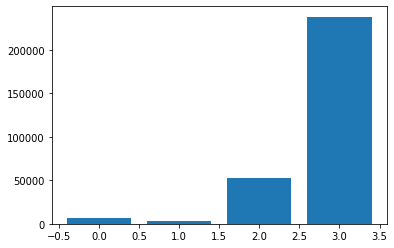

In [35]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, 'all')
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Mutual Information Feature Selection

In [ ]:
def select_features2(X_train, y_train, X_test, k):
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.151145
Feature 1: 0.214543
Feature 2: 0.352074
Feature 3: 0.290589


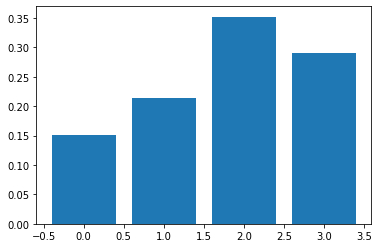

In [ ]:
X_train_fs, X_test_fs, fs = select_features2(X_train_enc, y_train_enc, X_test_enc, 'all')
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Model Built Using All Features
(k=4)

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
yhat = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Model Built Using Chi-Squared Features 
k =2: accuracy = 94.21
k =1: accuracy = 94.21
k = 3: accuracy: 94.42


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Model Built Using Mutual Information Features
k=2: accuracy = 94.21, k = 3: accuracy = 94.3



In [ ]:

X_train_fs, X_test_fs, fs = select_features2(X_train_enc, y_train_enc, X_test_enc, 1)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
dfWithoutMissingValues = df

Residence - функция для распределения места проживания совершивших преступление.(север, юг, центр, запад)

In [ ]:
def Residence(city):
    result=""
    north = (city=="חיפה" or city=="נצרת" or city=="עכו" or city=="עפולה" or city=="טמרה" or  city=="קרית אתא" or city=="כרמיאל" 
    or city=="שפרעם" or city=="נוף הגליל" or city=="מג'ד אל כרום" or  city=="קרית מוצקין" or city=="קרית ביאליק" or city=="קרית ים" 
    or city=="יפיע" or city=="נחף" or city=="נהריה" or city=="ג'דידה מכר" or city=="נשר" or city=="ריינה" or city=="טירת כרמל" 
    or city=="סח'נין" or city=="כפר כנא" or city=="אעבלין" or city=="כפר מנדא" or city=="עראבה" or city=="כפר יאסיף" 
    or city=="דייר אל אסד" or city=="עין מאהל" or city=="סלמה" or city=="חוסנייה" or city=="פקיעין" or city=="תל עדשים"
    or city=="כפר ביאליק" or city=="מגדים" or city=="מורן" or city=="כרם מהר''ל"  or city=="אליפלט" or city=="מעוז חיים"
    or city=="אבו סנאן" or city=="אכסאל" or city=="כאבול" or city=="מגדל העמק" or city=="עילוט" or city=="אום אל פחם"  
    or city=="ביענה" or city=="ירכא" or  city=="ראמה" or city=="משהד" or city=="שעב" or city=="עספיא" or city=="ביר אל מכסור" 
    or city=="יקנעם עילית" or city=="מעלות תרשיחא" or city=="מגאר" or city=="עתלית" or city=="קרית טבעון" or city=="חדרה" 
    or city=="דאלית אל כרמל" or  city=="טורעאן" or city=="דבוריה" or city=="מעלה עירון" or city=="בסמת טבעון" or city=="דייר חנא" 
    or city=="זרזיר" or city=="בית ג'ן" or city=="זכרון יעקב" or city=="טבריה" or city=="שבלי" or city=="כעביה טבאש חג'אג'רה"
    or city=="סאג'ור" or city=="מוקייבלה" or city=="מזרעה" or city=="רכסים" or  city=="פרדס חנה כרכור" or  city=="סולם שונם" 
    or city=="ג'וליס" or  city=="רמת ישי" or city=="צפת" or city=="כאוכב אבו אל היגא" or city=="פוריידיס" or  city=="כמאנה" 
    or city=="בועיינה נוג'יידאת" or city=="שלומי" or city=="כפר קרע" or city=="בית שאן" or city=="כפר ורדים" or city=="באקה אל ע'רביה" 
    or city=="אבטין" or city=="ערערה" or city=="כיסרא סומיע" or city=="עיילבון" or city=="יאנוח ג'ת" or city=="שייח' דנון" 
    or city=="אור עקיבא" or city=="נין" or city=="חריש" or city=="קרית שמונה" or  city=="בנימינה גבעת עדה" or city=="ג'יש" 
    or city=="נאעורה" or city=="טובא זנגריה" or city=="בסמ''ה" or city=="פסוטה" or city=="קיסריה" or city=="גן נר" or city=="חורפיש" 
    or city=="צנדלה" or  city=="עוזייר" or city=="כפר תבור" or  city=="כפר מיסר" or city=="טייבה ליד מולדת" or  city=="אחוזת ברק" 
    or city== "נופית" or city=="בוסתן הגליל" or city=="רומת היב" or  city=="גילון" or city=="מצפה אבי''ב" or city=="חצור הגלילית" 
    or city=="מג'דל שמס" or city=="עדי" or city=="ג'סר א זרקא" or city=="צורית" or city=="מעיליא" or city=="טמרה יזרעאל" 
    or city=="יובלים" or city=="טל אל" or city=="ח'ואלד" or city=="כמון" or city=="מנשית זבדה" or city=="אחיהוד" or city=="ראס עלי" 
    or city=="רקפת" or city=="לבון" or city=="ג'ת" or city=="שמשית" or city=="מורשת" or city=="גבע כרמל" or city=="עצמון שגב" 
    or city=="גבעת אלה" or city=="מכמנים" or city=="עראמשה" or city=="דחי" or  city=="אשחר" or city=="כפר חנניה"  
    or city=="שזור" or city=="חלוץ" or city=="קצרין" or  city=="לוטם" or city=="צרופה" or city=="מרחביה קיבוץ" or city=="שכניה" 
    or city=="ראש פינה" or city=="אמירים" or city=="שבי ציון" or city=="יסעור" or city=="עין אל אסד" or city=="בוקעתא" 
    or city=="קורנית" or city=="גשר הזיו" or city=="ראס אל עין" or city=="שורשים" or city=="רמת יוחנן" or city=="ערב אל נעים" 
    or city=="כפר כמא" or city=="עין איילה" or city=="רומאנה" or city=="תמרת" or city=="יודפת" or city=="כפר חסידים א'" 
    or city=="כפר ראש הנקרה" or city=="לוחמי הגיטאות" or city=="שפר" or city=="הושעיה" or city=="חוסן" or city=="יבנאל" 
    or city=="הסוללים" or city=="ציפורי" or city=="החותרים" or city=="עין יעקב" or city=="חבר" or city=="פרוד" or city=="יעד" 
    or city=="רגבה" or city=="עין המפרץ" or city=="גבעת אבני" or city=="ניר יפה" or city=="חזון" or city=="נווה זיו" or city=="אפק" 
    or city=="כברי" or city=="מעונה" or city=="כפר יחזקאל" or city=="שמרת" or city=="סער" or city=="אושה" or city=="יגור" 
    or city=="מיטב" or city=="אשרת" or city=="אילון" or city=="הררית" or city=="יקנעם" or city=="מרחביה מושב" or city=="רם און" 
    or city=="חמאם" or city=="יערה" or city=="מצובה" or city=="מנוף" or city=="אביטל" or city=="מדרך עוז" or city=="אלוני אבא"
    or city=="אלון הגליל" or city=="ספסופה" or city=="מסעדה" or city=="לימן" or city=="עבדון" or city=="מגדל"  
    or city=="מגן שאול" or city=="עין הוד" or city=="כפר יהושע" or city=="תובל" or city=="בלפוריה" or city=="עין כרמל"  
    or city=="כפר המכבי" or city=="כפר החורש" or city=="חרשים" or city=="דמיידה" or city=="אומן" or city=="עין העמק" 
    or city=="אדירים" or city=="אבטליון" or city=="דלתון" or city=="ברק" or city=="בר יוחאי" or city=="יפעת" or city=="כפר מסריק" 
    or city=="שדה יעקב" or city=="עמקה" or city=="דוב''ב" or city=="ע'ג'ר" or city=="חנתון" or city=="פוריה עילית" or city=="כליל" 
    or city=="חניתה" or city=="עין חוד" or city=="היוגב" or city=="קציר" or city=="נהלל" or city=="בית אורן" or city=="עברון" 
    or city=="מולדת" or city=="אליקים" or city=="כפר שמאי" or city=="בית השיטה" or city=="מלאה" or city=="מזרע" or city=="נתיב השיירה" 
    or city=="ריחאנייה" or city=="נס עמים" or city=="טפחות" or city=="מגידו" or city=="מנות" or city=="כפר קיש" or city=="סואעד"
    or city=="מצפה נטופה" or city=="שער העמקים" or city=="יסוד המעלה" or city=="הילה" or city=="עין דור" or city=="עלמה"
    or city=="פקיעין חדשה" or city=="גדיש" or city=="שריד" or city=="כפר ברוך" or city=="הזורע" or city=="רמת השופט" 
    or city=="רמת צבי" or city=="שדה נחום" or city=="עופר" or city=="גורן" or city=="רמות מנשה" or city=="מטולה" or city=="אביבים"
    or city=="הרדוף" or city=="כלנית" or city=="יאמון" or city=="גבת" or city=="אל ח'וואלד מערב" or city=="בית רימון" 
    or city=="ביריה" or city=="בית העמק" or city=="שומרה" or city=="פוריה נווה עובד" or city=="יחיעם" or city=="פרזון" or city=="פלך" 
    or city=="בית שערים" or city=="נחשולים" or city=="מעגן מיכאל" or city=="מירון" or city=="צוריאל" or city=="משמר העמק" 
    or city=="כפר חסידים ב'" or city=="הבונים" or city=="געתון" or city=="נטועה" or city=="גדעונה" or city=="עין קנייא" 
    or city=="בית חנניה" or city=="אדמית" or city=="גיתה" or city=="שדות ים" or city=="קדרים" or city=="לבנים" or city=="בן עמי"
    or city=="דברת" or city=="שדה אליעזר" or city=="רשפים" or city=="שדמות דבורה" or city=="בת שלמה" or city=="גיניגר"             
    or city=="כינרת מושבה" or city=="מחניים" or city=="מעיין צבי" or city=="חפצי בה" or city=="בית קשת" or city=="כורזים" 
    or city=="דבורה" or city=="ניר עציון" or city=="חיננית" or city=="רוויה" or city=="כפר גדעון" or city=="נווה ים" or city=="שתולה" 
    or city=="בני יהודה" or city=="עין חרוד מאוחד" or city=="עין השופט" or city=="בית יוסף" or city=="גזית" or city=="אלקוש"
    or city=="מייסר" or city=="כפר סאלד" or city=="חד נס" or city=="מסד" or city=="משמר הירדן" or city=="כרכום" or city=="מאור" 
    or city=="מנחמיה" or city=="דליה" or city=="שרונה" or city=="סאסא" or city=="תל יוסף" or city=="כחל" or city=="כרם בן זמרה" 
    or city=="צבעון" or city=="רמת דוד" or city=="בצת" or city=="שקד" or city=="שדי תרומות" or city=="שאר ישוב" or city=="אלונים" 
    or city=="אבן מנחם" or city=="גורנות הגליל" or city=="חולתה" or city=="דור" or city=="גבעת עוז" or city=="שדה נחמיה" 
    or city=="הזורעים" or city=="רחוב" or city=="אום אל קוטוף" or city=="גבעת ניל''י" or city=="אבירים" or  city=="מתת" 
    or city=="ירדנה" or city=="נורית" or city=="ניר דוד" or city=="אילניה" or city=="זרעית" or city=="עמיעד" or city=="גבע" 
    or city=="אשבל" or city=="עין חרוד איחוד" or city=="בית אלפא" or city=="רמות נפתלי" or city=="אלמגור" or city=="חספין" 
    or city=="לבנים" or city=="קלע" or city=="גן השומרון" or city=="ארבל" or city=="כפר בלום" or city=="ברעם" or city=="תל תאומים" 
    or city=="כפר הנשיא" or city=="כפר זיתים" or city=="מעלה גלבוע" or city=="בית הלל" or city=="נווה אור" or city=="נאות מרדכי" 
    or city=="כפר גלים" or city=="יעל" or city=="אור הגנוז" or city=="פוריה כפר עבודה" or city=="אמנון" or city=="גינוסר"  
    or city=="מרגליות" or city=="זבאבידה" or city=="אלי עד" or city=="בית זרע" or city=="אבו רביעה" or city=="עמוקה" or city=="יובל" 
    or city=="מירב" or city=="יפתח" or city=="חמדיה" or city=="יזרעאל" or city=="איילת השחר" or city=="מעיין ברוך"
    or city=="אבני איתן" or city=="קבאטיה" or city=="ג'ודידה" or city=="יעבד" or city=="עין גב" or city=="עמיקם" or city=="גבעת יואב"
    or city=="דן" or city=="קדיתא" or city=="אל רום" or city=="מבוא דותן" or city=="יראון" or city=="נאות גולן" or city=="שניר" 
    or city=="אלומות" or city=="מענית" or city=="ריחן" or city=="להבות הבשן" or city=="תלמי אלעזר" or city=="רביד"  
    or city=="מלכיה" or city=="שער הגולן" or city=="מעלה גמלא" or city=="טירת צבי" or city=="מצפה אילן" or city=="חוקוק" 
    or city=="דישון" or city=="בית לחם הגלילית" or city=="שדמות מחולה" or city=="שדה אילן" or city=="קשת"
    or city=="דגניה ב'" or city=="דגניה א'" or city=="גונן" or city=="אפיקים" or city=="מסדה" or city=="עראנה" or city=="נוב" 
    or city=="פקועה" or city=="מחולה" or city=="גן שמואל" or city=="קדמת צבי" or city=="אביאל" or city=="שילה"  
    or city=="מית'לון" or city=="מסילות" or city=="כפר פינס" or city=="כפר רופין" or city=="אניעם" or city=="מרום גולן" or city=="מנרה" 
    or city=="משמרות" or city=="מבוא חמה" or city=="כפר גלעדי" or city=="כינרת קבוצה" or city=="רמות" 
    or city=="אשדות יעקב איחוד" or city=="כישור" or city=="רמת מגשימים" or city=="עמיר" or city=="חברון" 
    or city=="כמאנה מזרח" or city=="שעל" or city=="שלוחות" or city=="שמיר" or city=="הגושרים" or city=="לפידות" or city=="ברקאי" 
    or city=="כפר חרוב" or city=="נטור" or city=="גלעד" or city=="נווה איתן" or city=="מי עמי" or city=="מחנה יהודית" 
    or city=="תל קציר" or city=="עין זיוון" or city=="כפר חיטים" or city=="עין עירון" or city=="גדות" or city=="דפנה" or city=="כנף" 
    or city=="רומאנה ממזרח לאום אל פחם" or city=="שדה אליהו" or city=="משגב עם" or city=="מאיר שפיה" or city=="מכחול" 
    or city=="עין הנצי''ב" or city=="לביא" or city=="כפר גליקסון" or city=="אל עריאן" or city=="גשור" or city=="אשדות יעקב מאוחד"
    or city=="מצפה" or city=="אורטל" or city=="בית זיד" or city=="אודם" or city=="מצר" or city=="מיצר" or city=="אל אסד" 
    or city=="אלוני יצחק" or city=="טנא" or city=="מעגן" or city=="גשר"or city=="כפר הנוער הדתי" or city=="נווה אטי''ב" 
    or city=="עין שמר" or city=="חוג'ייראת" or city=="הודיות מוסד חינוכי" or city=="חפץ חיים" or city=="אלוני הבשן")
    
    south = (city=="אשקלון" or  city=="אילת" or  city=="אשדוד" or city=="באר שבע" or city=="רהט" or city=="קרית גת"  
     or city=="שדרות" or city=="דימונה" or city=="אופקים" or city=="ערד" or city=="קרית מלאכי" or city=="לקיה" or city=="חורה" 
     or city=="ערערה בנגב" or city=="תל שבע" or city=="מסעודין אל עזאזמה" or city=="שגב שלום" or city=="כסיפה" or city=="אעצם" 
     or city=="עומר" or city=="ירוחם" or city=="מיתר" or city=="אבו רוקייק" or city=="להבים" or city=="יד בנימין" or city=="מצפה רמון"
     or city=="מבועים" or city=="קסר א סיר" or city=="מדרשת בן גוריון" or city=="עמנואל" or city=="תראבין א צאנה שבט"
     or city=="יטא יוטה" or city=="קרית ארבע" or city=="אבו ג'ווייעד" or city=="הוואשלה" or city=="מפלסים" or city=="יונתן" 
     or city=="רגבים" or city=="אבו קורינאת" or city=="אבו כף אום בטין" or city=="קטורה" or city=="נוקדים" or city=="בת הדר"
     or city=="אבו תלול" or city=="מרכז שפירא" or city=="ברור חיל" or city=="פארן" or city=="ג'אבליה נזלה" or city=="צופר" 
     or city=="תראבין א צאנה" or city=="ברכיה" or city=="א סייד שבט" or city=="אבו קרינאת" or city=="שדה יואב" or city=="א שויוח"
     or city=="דריג'את" or city=="הוזייל" or city=="מולדה" or city=="אטרש" or city=="רביבים" or city=="איבים" or city=="אשלים" 
     or city=="סוסיה" or city=="נחל עוז" or city=="זיקים" or city=="שחר" or city=="באר טוביה" or city=="שוקדה" or city=="חאן יונס"
     or city=="עין הבשור" or city=="יתד" or city=="רבדים" or city=="תלמים" or city=="נווה שלום" or city=="קבועה"
     or city=="באר אורה" or city=="א סייד" or city=="יד נתן" or city=="עזה" or city=="שתולים" or city=="דבירה" or city=="נתיבות"
     or city=="אביגדור" or city=="ביצרון" or city=="כפר ורבורג" or city=="כפר אביב" or city=="סופה" or city=="נווה מבטח" 
     or city=="ינון" or city=="שחרות" or city=="נועם" or city=="שלווה" or city=="ניצנה כפר נוער" or city=="כיסופים"
     or city=="תלמי ביל''ו" or city=="זמרת" or city=="בית גוברין" or city=="שדה ניצן" or city=="ניצן ב'" or city=="קוואעין"
     or city=="פדויים" or city=="ניצנים" or city=="ניר משה" or city=="ביר הדאג'" or city=="נאות הכיכר" or city=="חצור אשדוד" 
     or city=="בית עזרא" or city=="יבול" or city=="עמיעוז" or city=="כפר אחים" or city=="ארז" or city=="תקומה" or city=="תפרח" 
     or city=="נגבה" or city=="בארי" or city=="רוחמה" or city=="משמר הנגב" or city=="גבעות בר" or city=="תלמי יפה" or city=="קלחים"
     or city=="סעד" or city=="צוקים" or city=="חצבה" or city=="קודייראת א צאנה" or city=="יד מרדכי" or city=="ניצן" or city=="אילות" 
     or city=="מבקיעים" or city=="דורות" or city=="שדה עוזיהו" or city=="מגן" or city=="ניר עם" or city=="יטבתה" or city=="מבטחים" 
     or city=="משגב דב" or city=="עין צורים" or city=="עידן" or city=="ניר ישראל" or city=="כפר עזה" or city=="איתן" 
     or city=="מחנה יפה" or city=="רעים" or city=="חלץ" or city=="שדה בוקר" or city=="ניצני סיני" or city=="שדה דוד" 
     or city=="בית הגדי" or city=="ברוש" or city=="שקף" or city=="שובל" or city=="שדמה" or city=="תושיה" or city=="תדהר" 
     or city=="ניר יצחק" or city=="אור הנר" or city=="זרועה" or city=="כרמיה" or city=="גן הדרום" or city=="הר עמשא" or city=="זרחיה" 
     or city=="חולית" or city=="גיאה" or city=="נהורה" or city=="משען" or city=="ורדון" or city=="לכיש" or city=="גילת" 
     or city=="מחנה טלי" or city=="ניר ח''ן" or city=="יכיני" or city=="זבדיאל" or city=="מחנה יתיר" or city=="אבשלום" 
     or city=="מחנה יוכבד" or city=="גבעולים" or city=="ניר עקיבא" or city=="עין יהב" or city=="ישע" or city=="עין גדי" or city=="מישר" 
     or city=="עתניאל" or city=="אל עזי" or city=="אורות" or city=="אביעזר" or city=="טללים" or city=="רפיח" or city=="צוחר" 
     or city=="אשבול" or city=="כפר מימון" or city=="פרי גן" or city=="מסלול" or city=="חצב" or city=="כפר הרי''ף" or city=="שרשרת" 
     or city=="אורים" or city=="אבו עבדון" or city=="עין השלושה" or city=="נווה" or city=="שדה צבי" or city=="כרם יבנה" or city=="גבעתי" 
     or city=="נטע" or city=="אליפז" or city=="בית ניר" or city=="מנוחה" or city=="אוהד" or city=="נבטים" or city=="אבו עמאר"
     or city=="ג'אבליה  נזלה")
    
    center = (city=="תל אביב יפו" or city=="בת ים" or city=="טייבה" or  city=="נתניה" or city=="רמת גן" or city=="ראשון לציון" 
      or city=="פתח תקווה" or city=="הרצליה" or city=="רעננה" or city=="בני ברק" or city=="לוד" or  city=="חולון" 
      or city=="כפר סבא" or city=="גבעתיים" or  city=="רחובות" or  city == "ראש העין" or city == "רמת השרון" 
      or city=="הוד השרון" or city=="טירה" or city=="רמלה" or city=="כפר יונה" or city=="מודיעין מכבים רעות" or city=="כפר קאסם" 
      or city=="קלנסווה" or city=="יבנה" or city=="קדימה צורן" or city=="נס ציונה" or city=="גבעת שמואל" or city=="זמר" 
      or city=="באר יעקב" or city=="קרית אונו" or city=="אבן יהודה" or city=="תל מונד" or city=="יהוד מונוסון"  
      or city=="פרדסיה" or city=="צביה" or city=="ג'לג'וליה" or city=="גדרה" or city=="גן יבנה" or city=="אלעד" 
      or city=="גני תקווה" or city=="מודיעין עילית" or city=="אזור" or city=="שוהם" or city=="אליכין" 
      or city=="מזכרת בתיה" or city=="כוכב יאיר" or city=="אלפי מנשה" or city=="אורנית" or city=="בת חפר" or city=="סביון" 
      or city=="קרית עקרון" or city=="כפר ויתקין" or city=="שערי תקווה" or city=="קרני שומרון" or city=="בני עי''ש" 
      or city=="מכמורת" or city=="אור יהודה" or city=="אומץ" or city=="כפר ידידיה"
      or city=="בית יצחק שער חפר" or city=="כפר ברא" or city=="בית אריה" or city=="צור יצחק" or city=="בית דגן" or city=="אביחיל" 
      or city=="כפר שמריהו" or city=="קדומים" or city=="צור משה" or city=="חופית" or city=="שער אפרים" 
      or city=="נווה ימין" or city=="עין ורד" or city=="סלעית" or city=="צופין" or city=="נורדיה" or city=="בני דרור" 
      or city=="בית הלוי" or city=="חרב לאת" or city=="רשפון" or city=="בארותיים" or city=="בצרה" 
      or city=="אודים" or city=="גני מודיעין" or city=="מתן" or city=="כפר הרא''ה" or city=="בית חרות" 
      or city=="חניאל" or city=="גבעת חיים איחוד" or city=="עין שריד" or city=="כפר הס" or city=="כרמי יוסף" or city=="להבות חביבה" 
      or city=="תל יצחק" or city=="ניצני עוז" or city=="מעברות" or city=="עולש" or city=="כפר מונש" or city=="אחיטוב" 
      or city=="אלישמע" or city=="שדה ורבורג" or city=="עלי" or city=="נירית" or city=="נעלה" or city=="גבעת חיים מאוחד" 
      or city=="ברכה" or city=="חיבת ציון" or city=="זיתן" or city=="בן שמן" or city=="מגל" or city=="כפר יעבץ" or city=="חרות" 
      or city=="יד חנה" or city=="נווה ירק" or city=="אבני חפץ" or city=="צפריה" or city=="ירחיב" or city=="כפר חב''ד" 
      or city=="בקוע" or city=="בניה" or city=="ינוב" or city=="מקווה ישראל" or city=="מעלה אפרים" or city=="שדי חמד"
      or city=="בני ציון" or city=="הדר עם" or city=="צור נתן" or city=="נען" or city=="ברקת" or city=="כפר תפוח" or city=="טלמון" 
      or city=="עזריאל" or city=="טול כרם" or city=="מעש" or city=="בית צבי" or city=="בית חורון" or city=="ישרש"  
      or city=="בת חן" or city=="כפר חיים" or city=="גן יאשיה" or city=="רמות השבים" or city=="נחלים" or city=="לוזית"  
      or city=="שושנת העמקים" or city=="חגלה" or city=="גבעת שפירא" or city=="טל שחר" or city=="כפר הנגיד" or city=="צלפון" 
      or city=="שפיים" or city=="בית ינאי" or city=="שריגים" or city=="פלמחים" or city=="גני יוחנן" or city=="בני ראם" or city=="יגל" 
      or city=="אייל" or city=="תרום" or city=="מסילת ציון" or city=="יקום" or city=="חשמונאים" or city=="נוף איילון"  
      or city=="עגור" or city=="גאולים" or city=="לפיד" or city=="גנות הדר" or city=="חבצלת השרון" or city=="מבוא ביתר" 
      or city=="בית חשמונאי" or city=="עשרת" or city=="עזריה" or city=="געש" or city=="חורשים" or city=="פורת" or city=="קדרון" 
      or city=="בית נחמיה" or city=="כפר נטר" or city=="המעפיל" or city=="יד רמב''ם" or city=="מוצא עילית" or city=="גליל ים" 
      or city=="בורגתה" or city=="אמונים" or city=="ביתן אהרן" or city=="צופית" or city=="צוקי ים" or city=="תלמי יחיאל" 
      or city=="בית יהושע" or city=="בית עריף" or city=="נטף" or city=="חגור" or city=="עזריקם" or city=="משמרת"  
      or city=="ניל''י" or city=="כפר שמואל" or city=="אחיעזר" or city=="אלישיב" or city=="בחן" or city=="העוגן" or city=="בית חנן" 
      or city=="גאולי תימן" or city=="גבעת ברנר" or city=="כפר טרומן" or city=="נופך" or city=="חדיד" or city=="משמר השרון" 
      or city=="גמזו" or city=="כפר סירקין" or city=="יציץ" or city=="כפר רות" or city=="אלומה" or city=="ערוגות" or city=="תימורים" 
      or city=="נחשון" or city=="חמד" or city=="קטנה" or city=="תנובות" or city=="כפר בן נון" or city=="גנות" or city=="מחנה הילה" 
      or city=="מגשימים" or city=="גאליה" or city=="בני עטרות" or city=="בית עובד" or city=="נתיב הל''ה" or city=="נטעים" 
      or city=="גן חיים" or city=="ארסוף" or city=="ירקונה" or city=="שעלבים" or city=="עזר" or city=="ארגמן" or city=="כפר דניאל" 
      or city=="רמות מאיר" or city=="מחנה תל נוף" or city=="גבעת ח''ן" or city=="בית חלקיה" or city=="חלמיש" or city=="יסודות" 
      or city=="פתחיה" or city=="ניר צבי" or city=="כפר אוריה" or city=="יעף" or city=="מצליח" or city=="שואבה" or city=="מטע"
      or city=="שדה יצחק" or city=="כפר מל''ל" or city=="גינתון" or city=="גבעת כ''ח" or city=="אירתאח" or city=="נחשונים" 
      or city=="בית ברל" or city=="קרית ענבים" or city=="סתריה" or city=="רינתיה" or city=="בן זכאי" or city=="משמר דוד" 
      or city=="גני הדר" or city=="זכריה" or city=="נעמי" or city=="שלומית" or city=="רמת הכובש" or city=="מבואות ים"
      or city=="חרוצים" or city=="פדיה" or city=="שילת" or city=="נצר חזני" or city=="אשתאול" or city=="קבוצת יבנה" or city=="גיזו" 
      or city=="מזור" or city=="גת" or city=="בן שמן כפר נוער" or city=="בית עוזיאל" or city=="נווה מיכאל" or city=="אירוס" 
      or city=="חולדה" or city=="עדנים" or city=="ניר אליהו" or city=="נחושה" or city=="גבעת השלושה" or city=="רמת רזיאל" 
      or city=="גני עם" or city=="ניר גלים" or city=="קוממיות" or city=="עינת" or city=="משמר איילון" or city=="משמר השבעה" 
      or city=="תעוז" or city=="בית רבן" or city=="בית גמליאל" or city=="גן שלמה" or city=="עין החורש" or city=="בית מאיר" 
      or city=="מעגלים")
    
    west = (city=="ירושלים" or city=="בית שמש" or city=="מבשרת ציון" or city=="ביתר עילית" or city=="גבעת זאב" or city=="מעלה אדומים" 
     or city=="אבו גוש" or  city=="צור הדסה" or city=="אפרת" or city=="עין ראפה" or city=="כוכב השחר" or city=="עין נקובא" 
     or city=="אלון שבות" or city=="עלי זהב" or city=="כפר אדומים" or city=="עפרה" or city=="נס הרים" or city=="אלקנה" 
     or city=="תקוע" or city=="גבע בנימין" or city=="אלעזר" or city=="יריחו" or city=="ורד יריחו" or city=="בית לחם" 
     or city=="רימונים" or city=="בת עין" or city=="ג'לבון" or city=="קרית יערים" or city=="שכם" or city=="גלגל" or city=="מתתיהו" 
     or city=="גיתית" or city=="הר אדר" or city=="אריאל" or city=="קדר" or city=="אלון מורה" or city=="ראבא" or city=="כוכב יעקב"
     or city=="בית פוריכ" or city=="ג'בע" or city=="בית אל" or city=="בית זית" or city=="כפר האורנים" or city=="א ראם"
     or city=="אלעיזריה" or city=="רמאללה" or city=="בר גיורא" or city=="אל מוע'ייר" or city=="בית עווא" or city=="רבבה"
     or city=="סילת אל ח'רית'יה" or city=="ג'נין" or city=="דיר אבו דעיף" or city=="פצאל" or city=="רחלים" or city=="סיריס"
     or city=="חמרה" or city=="נווה דניאל" or city=="פסגות" or city=="חרמש" or city=="מגדלים" or city=="אום א תות"
     or city=="דולב" or city=="כיפל חארת" or city=="עין אל בידא" or city=="חוסאן" or city=="גבעון החדשה"
     or city=="הר גילה" or city=="עג'ה" or city=="רותם" or city=="קרית נטפים" or city=="שורש" or city=="קליה"
     or city=="עראבה ליד ג'נין" or city=="בקעות" or city=="תלם" or city=="מצפה יריחו" or city=="צרעה" or city=="ענב" 
     or city=="סיעיר" or city=="יקיר" or city=="ג'למה" or city=="סאנור" or city=="עץ אפרים" or city=="עוריף" or city=="נופים"
     or city=="רועי" or city=="ברקן" or city=="תומר" or city=="אורה" or city=="יפית" or city=="נתיב הגדוד" or city=="קלקיליה" 
     or city=="מירכה" or city=="חמדת" or city=="מזרעה אל קיבליה" or city=="עקבה בשומרון" or city=="כפר ראעי" or city=="טובאס"
     or city=="דיר בלוט" or city=="מצפה שלם" or city=="עאנין" or city=="ברוכין" or city=="בורוקין" or city=="רנתיס" or city=="אל ערוב"
     or city=="פסאיל" or city=="סילואד" or city=="ברדלה" or city=="איתמר" or city=="אל בירה" or city=="דיר ע'זאלה"
     or city=="בורקין" or city=="ביר זית" or city=="חרבת ראס עטיה" or city=="עלמון" or city=="עטרת" or city=="גפן" 
     or city=="מעלה לבונה" or city=="מבוא חורון" or city=="מרג' נעג'ה" or city=="האשימיה" or city=="ענאתא" 
     or city=="אידנא" or city=="ייט''ב" or city=="צובה" or city=="רפידא" or city=="אספר" or city=="ג'לקמוס" or city=="חלחול" 
     or city=="אבנת" or city=="נחליאל" or city=="חרבת עבא" or city=="מכורה" or city=="סוריף" or city=="ביתא א תחתא" 
     or city=="דהיישה מחנה פליטים" or city=="זובובא" or city=="כפר דאן" or city=="פרעה ג'יפטליק" or city=="אלמוג" or city=="כפר ניעמה" 
     or city=="טמון" or city=="קפין" or city=="סמוע" or city=="ח'ירבת א טייבה" or city=="בית דג'ן- שומרון" 
     or city=="עקאבת ג'בר מחנה פליטים" or city=="ערקה" or city=="עקרבה" or city=="בני נעים" or city=="פרעון" or city=="ח'ראס" 
     or city=="בית אומר" or city=="שבי שומרון" or city=="יצהר")
    
    if north:
        result="north"
    elif south:
        result="south"
    elif center:
        result="center"
    elif west:
        result="west"
    else:
        result="unknown"
    return result

In [ ]:
list=[]
for index, row in df.iterrows():
    list.append(Residence(row["תאור ישוב אזרח"]));

In [ ]:
df["מקום מגורים"]=pd.Series(list)

In [ ]:
df.dtypes

In [ ]:
print("Количество данных с пропусками: " + str(len(df.axes[0])))

In [ ]:
dfWithoutMissingValues = dfWithoutMissingValues.loc[(dfWithoutMissingValues["קטגורית עבירה 0"]!="לא ידוע") 
                                                & (dfWithoutMissingValues["מין אזרח"]!="לא ידוע")
                                                & (dfWithoutMissingValues["תאור ישוב אזרח"]!="לא ידוע")
                                                & (dfWithoutMissingValues["דת אזרח"]!="לא ידוע")
                                                & (dfWithoutMissingValues["קבוצת גיל בזמן עבירה"]!='-')
                                                & (dfWithoutMissingValues["קבוצת רכב"]!='-')
                                                & (dfWithoutMissingValues["קבוצת רכב"]!= "לא ידוע")]

In [ ]:
print("Количество данных без пропусков: " + str(len(dfWithoutMissingValues.axes[0])))

Для начала проанализируем данные с пропусками.

Совершенные преступления и их количество, сортированные в порядке убывания.

In [ ]:
crimeName = pd.DataFrame(df["סמל עבירה"].value_coutns())
crimeName

In [ ]:
religa = pd.DataFrame(df["דת אזרח"].value_counts())
religa

Типы совершенных преступлений и их количество, сортированные в порядке убывания.

In [ ]:
crimeAll=pd.DataFrame(df["קטגורית עבירה 0"].value_counts())
crimeAll

Разделение по половому признаку среди всех преступников. Мужчины совершали преступления почти в 3 раза чаще, чем женщины.

In [ ]:
sex = pd.DataFrame(df["מין אזרח"].value_counts())
sex

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(sex, labels = ["Male", "Female", "Unknown"], autopct='%1.1f%%')
plt.show()

Таблица видов транспорта, на котором чаще всего было совершенно преступление. Согалсно данным, преступления чаще всего совершались на частном транспорте.

In [ ]:
typeOfTransport = pd.DataFrame(df["קבוצת רכב"].value_counts())

In [ ]:
typeOfTransport

In [ ]:
def ReverseNames(array):
    array_new = [];
    for a in array:
        array_new.append(a[::-1])
    return array_new;
        

In [ ]:
plt.figure(figsize=(28,10), dpi=80)
plt.rcParams.update({'font.size': 20})
transport = df["קבוצת רכב"].unique();
transport_ivrit= ReverseNames(transport);
plt.bar(transport_ivrit, typeOfTransport["קבוצת רכב"].unique())
plt.show()

In [ ]:
notPrivateTransport = typeOfTransport.loc[typeOfTransport.index != 'פרטי'].sum()

Круговая диаграмма для наглядности по процентам, 81% наршуений были совершены на частных автомобилях.

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
plt.pie([notPrivateTransport, typeOfTransport["קבוצת רכב"][0]], labels = ["Other", "Private"], autopct='%1.1f%%')
plt.show()

Города, где были зафиксированы нарушения и количество нарушений. Согласно данным, преступления были совершены только в Северном райне страны

In [ ]:
pd.DataFrame(df["תאור ישוב מלא"].value_counts())

Города, где проживают преступники, совершившие преступления(вся страна)

In [ ]:
pd.DataFrame(df["תאור ישוב אזרח"].value_counts())

График по всем преступлениям по регионам(в процентном соотношении). Больше всего 91,04% проживающих на севере, там же где и были совершенны преступления.

In [ ]:
amountResidents=df["מקום מגורים"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(amountResidents, labels = ['North', 'Center', 'Unknown', 'South', 'West'], autopct='%1.2f%%', startangle=10, 
        explode=[0.8, 1, 1,1, 1]) 
plt.show()

Категории преступлений и количество нарушений в этих категориях ТОЛЬКО для жителей северного региона.

In [ ]:
crimeNorth=pd.DataFrame(df.loc[df["מקום מגורים"]=="north"]["קטגורית עבירה 0"].value_counts())
crimeNorth

На графике показано наглядно, голубым - количество нарушений по определенной категории, совершенные людьми, проживающими в Северном регионе. Желтым- количество нарушений по определнной категории, совершенные проживающими по всей стране. Можно увидеть, что поскольку все нарушения зафиксированы в Северном регионе, то и большинство нарушителей - жители Северного региона.

In [ ]:
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 100})
plt.bar(ReverseNames(crimeAll.index), crimeAll["קטגורית עבירה 0"], color="yellow")
plt.bar(ReverseNames(crimeNorth.index), crimeNorth["קטגורית עבירה 0"], color="blue")
plt.show()

Соотношение нарушений по разлиным категориям(каждый график - отдельная категория). Соотношение колитчества нарушителей из северного региона и других регионов.

In [ ]:
for i in range(crimeAll.shape[0]):
    plt.rcParams.update({'font.size': 10})
    plt.pie([(crimeAll["קטגורית עבירה 0"][i]-crimeNorth["קטגורית עבירה 0"][i]),crimeNorth["קטגורית עבירה 0"][i]],
           labels = ['Other', 'North'], autopct='%1.2f%%')
    plt.title(crimeAll.index[i][::-1])
    plt.show()
    

График нарушителей из всех категорий и всех нарушений(с пропусками) по возрастам. Видим, что самый большой процент 21.01% - категория 34-43 лет, следующая за ним категория 44-53 - 15.74%, третья по величине категория 54-63 - 10.77%. Из чего можно сделать вывод, что почти половина нарушителей в возрасте 34-63 лет.

In [ ]:
agePeople=df["קבוצת גיל בזמן עבירה"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(agePeople, labels = ['34-43', '44-53', '54-63', '30-33', '24-26', '27-29', '21-23', '17-20','64-73', '-', '74+', '15-16', '0-14'], autopct='%1.2f%%') 
plt.show()

Следующим шагом посмотрим на график по всем нарушениям, исходя из пола и возраста человека. Мы можем увидеть, что практически во всех возрастных категориях, женщины сделали меньше чем в 2 раза наршуений, чем сделали мужчины.Наибольшее количество нарушавших среди женщин и мужчин относится к категории 34-43.Можно заметить значительную разницу среди нарушений мужчин и женщин в категории 17-20. Из этой категории мужчин сделало нарушений значительно больше чем женщин(8.87% мужчины,3.69% - женщины).

In [ ]:
ageMan = df.loc[df["מין אזרח"]=="זכר"]["קבוצת גיל בזמן עבירה"].value_counts()
ageWoman = df.loc[df["מין אזרח"]=="נקבה"]["קבוצת גיל בזמן עבירה"].value_counts()
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 50})
plt.bar(ageMan.index, ageMan.values, color="yellow")
plt.bar(ageWoman.index, ageWoman.values, color="blue")
plt.show()

График нарушителей из всех категорий и всех нарушений(с пропусками) по возрастам отдельно для мужчин и женщин. Видим, что и среди женщин и среди мужчин наибольшее количество нарушений из категории возрасто 34-43.

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(1, 2, 1)
plt.title("Man")
plt.pie(ageMan, labels=ageMan.index, autopct='%1.2f%%') 
plt.subplot(1, 2, 2)
plt.title("Woman")
plt.pie(ageWoman, labels = ageWoman.index, autopct='%1.2f%%') 
plt.show()

Количество наршуений по категория возрастным.

In [ ]:
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 50})
plt.bar(agePeople.index, agePeople.values, color="yellow")
plt.show()

График по всем нарушениям, анализ оценки возраста в каждой категории нарушений. Исходя из графиков, можем видеть, что большинств нарушителей в категории велосипеды - молодые люди 15-20 лет. Также категория технические нарушения - почти половина нарушителей, люди в возрасте 17-23 лет. А пьянство/накротики  наибольшим процентом(22.57) нарушений - возраст 21-23 года и 34-43 года(16.13 процента). Вождение после дисквалификации прав 18.55% - 17-20 лет и 17.53% - в возрасте 21-23 лет. Эти же две категории больше всгео имеют нарушений в категории преступления освещения. В большинстве остальных нарушений на первом месте по количеству нарушений возрастная категория 34-43.

In [ ]:
for crime in crimeAll.index:
    tograph = df.loc[df["קטגורית עבירה 0"]==crime]['קבוצת גיל בזמן עבירה'].value_counts()
    plt.pie(tograph, labels=tograph.index, autopct='%0.2f%%') 
    plt.title(crime[::-1])
    plt.show()
   

График по всем нарушениям, анализ оценки возраста в каждой категории нарушений в зависимости от региона проживания. В категории использования средств безопасности можно заметить, что во всех регионах, кроме восточного первым по количеству нарушений является категория 34-43. А в восточном регионе категория 17-20(18.67%), в восточном регионе категория 34-43 занимает второе место с 18%. В категории целостность автомобился(תקינות רכב) только в северном регионе на первом месте категория нарушителей 17-20. В остальных регионах это категория 34-43. В категории безрасдуное вождение(נהיגה בחוסר זהירות) в западном регионе первенство занимает категория 30-33(22.58%), в это же время как в остальных регионах категори 30-33 не первышает количество от всех нарушителей 11%. В категории алкоголь/наркотикиЖ первое место в северном и централььном регионе занимают категории 21-23, второе место категория 34-43, третье - категория 24-26. В это же время на западе, первое место занимает категория 24-26(27.27%) и первое место на востоке 19.15%. В категории מטען וגרירות(груз и буксировка) первое место по количеству нарушений занимает категори 34-43 во всех регионах, кроме западнго - там первое место занимает категория 30-33(27.27%). 

In [ ]:
for crime in crimeAll.index:
    i=1;
    plt.figure(figsize=(30,30))
    for a in amountResidents.index:
        plt.subplot(1, amountResidents.index.shape[0], i)
        i+=1
        tograph = df.loc[(df["קטגורית עבירה 0"]==crime) & (df["מקום מגורים"]==a)]['קבוצת גיל בזמן עבירה'].value_counts()
        plt.pie(tograph, labels=tograph.index, autopct='%0.2f%%') 
        plt.title(crime[::-1] + " " + a)
    plt.show()
   

Теперь проведем анализ данных без пропусков.

Совершенные преступления и их количество, сортированные в порядке убывания. Можем заметить, что в данных без пропусков значения изменились не значительно. Это не повлияло на изменение в частоте какого-то отдельного преступления.

In [ ]:
crimeNameWM = pd.DataFrame(dfWithoutMissingValues["סמל עבירה"].value_counts())
crimeNameWM

Анализ количества преступлений по категориям преступлений. После удаления данных с пропусками, можем видеть, что категория пешеходы по количеству нарушений опустилась на 4 место, когда в полном наборе данных была на 3 месте.

In [ ]:
crimeAllWM=pd.DataFrame(dfWithoutMissingValues["קטגורית עבירה 0"].value_counts())
crimeAllWM

Разделение по половому признаку среди всех преступников. Мужчины совершали преступления почти в 3 раза чаще, чем женщины. 

In [ ]:
sexWM = pd.DataFrame(dfWithoutMissingValues["מין אזרח"].value_counts())
sexWM

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(sexWM, labels = ["Male", "Female"], autopct='%1.1f%%')
plt.show()

Таблица видов транспорта, на котором чаще всего было совершенно преступление. Согалсно данным, преступления чаще вссего совершались на частном транспорте.

In [36]:
typeOfTransportWM = pd.DataFrame(dfWithoutMissingValues["קבוצת רכב"].value_counts())
typeOfTransportWM

NameError: ignored

In [ ]:
plt.figure(figsize=(28,10), dpi=80)
plt.bar(dfWithoutMissingValues["קבוצת רכב"].unique(), typeOfTransportWM["קבוצת רכב"].unique())
plt.show()

Круговая диаграмма для наглядности по процентам, 83.7% наршуений были совершены на частных автомобилях.

In [ ]:
notPrivateTransportWM = typeOfTransportWM.loc[typeOfTransportWM.index != 'פרטי'].sum()

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 6), dpi=80)
plt.pie([notPrivateTransportWM, typeOfTransportWM["קבוצת רכב"][0]], labels = ["Other", "Private"], autopct='%1.1f%%')
plt.show()

Города, где проживают преступники, совершившие преступления(вся страна)

In [ ]:
pd.DataFrame(dfWithoutMissingValues["תאור ישוב אזרח"].value_counts())

График по всем преступлениям по регионам(в процентном соотношении). Больше всего 94.41%(c пропущенными/отсутствующими данными было 91,04%) проживающих на севере, там же где и были совершенны преступления.

In [ ]:
amountResidentsWM=dfWithoutMissingValues["מקום מגורים"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(amountResidentsWM, labels = ['North', 'Center','South', 'West'], autopct='%1.2f%%', startangle=10, 
        explode=[0.8, 1, 1,1]) 
plt.show()

Категории преступлений и количество нарушений в этих категориях ТОЛЬКО для жителей северного региона. Опять же можно заметить, что категория пешеходы по количеству нарушений опустилась на 5 место(была на третьем).

In [ ]:
crimeNorthWM=pd.DataFrame(dfWithoutMissingValues.loc[dfWithoutMissingValues["מקום מגורים"]=="north"]["קטגורית עבירה 0"].value_counts())
crimeNorthWM

На графике показано наглядно, голубым - количество нарушений по определенной категории, совершенные людьми, проживающими в Северном регионе. Желтым- количество нарушений по определнной категории, совершенные проживающими по всей стране. Можно увидеть, что поскольку все нарушения зафиксированы в Северном регионе, то и большинство нарушителей - жители Северного региона.

In [ ]:
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 100})
plt.bar(crimeAllWM.index, crimeAllWM["קטגורית עבירה 0"], color="yellow")
plt.bar(crimeNorthWM.index, crimeNorthWM["קטגורית עבירה 0"], color="blue")
plt.show()

Соотношение нарушений по разлиным категориям(каждый график - отдельная категория). Соотношение колитчества нарушителей из северного региона и других регионов. После удаления отсутсвующих данных, процент наршуений на севере в каждой из категори увеличился.

In [ ]:
for i in range(crimeAllWM.shape[0]):
    plt.rcParams.update({'font.size': 10})
    plt.pie([(crimeAllWM["קטגורית עבירה 0"][i]-crimeNorthWM["קטגורית עבירה 0"][i]),crimeNorthWM["קטגורית עבירה 0"][i]],
           labels = ['Other', 'North'], autopct='%1.2f%%')
    plt.title(crimeAllWM.index[i][::-1])
    plt.show()

График нарушителей из всех категорий и всех нарушений(с пропусками) по возрастам. Видим, что самый большой процент 21.74%(был 21.01%) - категория 34-43 лет, следующая за ним категория 44-53 - 16.20%(был 15.74%), третья по величине категория 54-63 - 11.22%(был 10.77%). Из чего можно сделать вывод, что почти половина нарушителей в возрасте 34-63 лет.

In [ ]:
agePeopleWM=dfWithoutMissingValues["קבוצת גיל בזמן עבירה"].value_counts()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(agePeopleWM, labels = ['34-43', '44-53', '54-63', '30-33', '24-26', '27-29', '21-23', '17-20','64-73', '74+', '15-16', '0-14'], autopct='%1.2f%%') 
plt.show()

Следующим шагом посмотрим на график по всем нарушениям, исходя из пола и возраста человека. Мы можем увидеть, что практически во всех возрастных категориях, женщины сделали меньше чем в 2 раза наршуений, чем сделали мужчины.Наибольшее количество нарушавших среди женщин и мужчин относится к категории 34-43.Можно заметить значительную разницу среди нарушений мужчин и женщин в категории 17-20. Из этой категории мужчин сделало нарушений значительно больше чем женщин(8.87% мужчины,3.69% - женщины. Также как и в данных с пропусками.

In [ ]:
ageManWM = dfWithoutMissingValues.loc[dfWithoutMissingValues["מין אזרח"]=="זכר"]["קבוצת גיל בזמן עבירה"].value_counts()
ageWomanWM = dfWithoutMissingValues.loc[dfWithoutMissingValues["מין אזרח"]=="נקבה"]["קבוצת גיל בזמן עבירה"].value_counts()
ageManWM = ageManWM.sort_index()
ageWomanWM = ageWomanWM.sort_index()

plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 100})
plt.bar(ageManWM.index, ageManWM.values, color="yellow")
plt.bar(ageWomanWM.index, ageWomanWM.values, color="blue")
plt.show()

График нарушителей из всех категорий и всех нарушений по возрастам отдельно для мужчин и женщин. Видим, что и среди женщин и среди мужчин наибольшее количество нарушений из категории возрасто 34-43.

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(1, 2, 1)
plt.title("Man")
plt.pie(ageManWM, labels=ageManWM.index, autopct='%1.2f%%') 
plt.subplot(1, 2, 2)
plt.title("Woman")
plt.pie(ageWomanWM, labels = ageWomanWM.index, autopct='%1.2f%%') 
plt.show()

Количество наршуений по категория возрастным.

In [ ]:
plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size': 100})
plt.bar(agePeopleWM.index, agePeopleWM.values, color="yellow")
plt.show()

График по всем нарушениям, анализ оценки возраста в каждой категории нарушений. Исходя из графиков, можем видеть, что большинств нарушителей в категории велосипеды - молодые люди 15-20 лет. Также категория технические нарушения - почти половина нарушителей, люди в возрасте 17-23 лет. А пьянство/накротики наибольшим процентом(23.23%) нарушений - возраст 21-23 года и 34-43 года(15.58 процента). Вождение после дисквалификации прав 18.31% - 17-20 лет и 17.61% - в возрасте 21-23 лет. Эти же две категории больше всгео имеют нарушений в категории преступления освещения. В большинстве остальных нарушений на первом месте по количеству нарушений возрастная категория 34-43.

In [ ]:
for crime in crimeAllWM.index:
    plt.rcParams.update({'font.size': 10})
    tographWM = dfWithoutMissingValues.loc[dfWithoutMissingValues["קטגורית עבירה 0"]==crime]['קבוצת גיל בזמן עבירה'].value_counts()
    plt.pie(tographWM, labels=tographWM.index, autopct='%0.2f%%') 
    plt.title(crime[::-1])
    plt.show()

График по всем нарушениям, анализ оценки возраста в каждой категории нарушений в зависимости от региона проживания. В категории использования средств безопасности можно заметить, что во всех регионах, кроме восточного первым по количеству нарушений является категория 34-43. А в восточном регионе категория 17-20(18.49%), в восточном регионе категория 34-43 занимает второе место с 17.81%. В категории целостность автомобился(תקינות רכב) только в северном регионе на первом месте категория нарушителей 17-20(20.75%). В остальных регионах это категория 34-43. В категории безрасдуное вождение(נהיגה בחוסר זהירות) в западном регионе первенство делаят категории 30-33(20%) и 21-23(тоже 20%), в это же время как в остальных регионах категори 30-33 не первышает количество от всех нарушителей 11%. В категории алкоголь/наркотики первое место в северном и центральном регионе занимают категории 21-23, второе место категория 34-43, третье - категория 24-26. В это же время на западе, первое место занимает категория 24-26(31.58%) и второе место на востоке 18.60%(а занимала первое в полном наборе данных).В восточном регионе первое место теперь занимает категория 17-20(20.93%) В категории מטען וגרירות(груз и буксировка) первое место по количеству нарушений занимает категори 34-43 во всех регионах, кроме западнго - там первое место занимает категория 30-33(27.27%). 

In [ ]:
for crime in crimeAllWM.index:
    i=1;
    plt.figure(figsize=(30,30))
    for a in amountResidentsWM.index:
        plt.rcParams.update({'font.size': 15})
        plt.subplot(1, amountResidentsWM.index.shape[0], i)
        i+=1
        tographWM = dfWithoutMissingValues.loc[(dfWithoutMissingValues["קטגורית עבירה 0"]==crime) 
                                             & (dfWithoutMissingValues["מקום מגורים"]==a)]['קבוצת גיל בזמן עבירה'].value_counts()
        plt.pie(tographWM, labels=tographWM.index, autopct='%0.2f%%') 
        plt.title(crime[::-1] + " " + a)
    plt.show()
   

In [ ]:
date2020 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2021 = datetime.strptime('2021-01-01', '%Y-%m-%d')

In [ ]:
populationIsrael = 	9359000;
dfAllIsrael = pd.DataFrame({'Age': ['0-14', '15-16', '17-20', '21-23', '24-26', '27-29', '30-33', '34-43', '44-53', '54-63', '64-73', '74+'], 
                            'Male': [51.24, 51.24, 51.24, 51.24, 49.46, 49.46, 49.46, 49.46, 49.46, 49.46, 49.46, 43.67], 
                            'Female': [48.68, 48.68, 48.68, 48.68, 50.54, 50.54, 50.54, 50.54, 50.54, 50.54, 50.54, 56.33]})
dfAllIsrael

In [ ]:
dfAllIsraelPop = pd.DataFrame({'Age': ['0-14', '15-16', '17-20', '21-23', '24-26', '27-29', '30-33', '34-43', '44-53', '54-63', '64-73', '74+'], 
                            'Proc': [27.3, 62.2, 62.2, 62.2, 62.2, 62.2, 62.2, 62.2, 62.2, 62.2, 10.5, 10.5]})

На сайте https://knoema.ru/atlas/%D0%98%D0%B7%D1%80%D0%B0%D0%B8%D0%BB%D1%8C/topics/%D0%94%D0%B5%D0%BC%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A1%D0%BE%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BF%D0%BE%D0%BB%D0%BE%D0%B2 нашла процентное соотношение по гендерному признаку в трех возрастных категориях среди всего населения Израиля за 2020 год. Там же нашла количество населения Израиля на 2020 год. Построила свой график, где вычислено процентное соотношение нарушавших в возрастной категории к количеству людей из этой категории, проижвающих в Израиле в 2020 году. 
Также мы имеем процентное соотношение среди получивших права в определенном возрасте в 2020 году по всему Израилю. Отметим, что распределния данных схожи между собой.

In [ ]:
ageManWM = dfWithoutMissingValues.loc[(dfWithoutMissingValues["מין אזרח"]=="זכר")
                                      & (dfWithoutMissingValues["זמן"]>=date2020)
                                      & (dfWithoutMissingValues["זמן"]<date2021)]["קבוצת גיל בזמן עבירה"].value_counts()
ageWomanWM = dfWithoutMissingValues.loc[(dfWithoutMissingValues["מין אזרח"]=="נקבה") 
                                      & (dfWithoutMissingValues["זמן"]>=date2020)
                                      & (dfWithoutMissingValues["זמן"]<date2021)]["קבוצת גיל בזמן עבירה"].value_counts()

ageManWM = ageManWM.sort_index()
ageWomanWM = ageWomanWM.sort_index()

ageManWM = ageManWM.astype(float)
count = 0;
for i in ageManWM.index:
    countVal = (ageManWM.values[count]/(dfAllIsrael['Male'][count]*populationIsrael))*100;
    ageManWM.values[count] = countVal;
    count = count+1;
    
ageWomanWM = ageWomanWM.astype(float)
count = 0;
for i in ageWomanWM.index:
    countVal = (ageWomanWM.values[count]/(dfAllIsrael['Female'][count]*populationIsrael))*100;
    ageWomanWM.values[count] = countVal;
    count = count+1;

plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size':50})
plt.bar(ageWomanWM.index, ageWomanWM.values, color="blue", align='edge', width=0.3)
plt.bar(ageManWM.index, ageManWM.values, color="yellow", align='edge', width=-0.3)
plt.show()

In [ ]:
PATH = 'C:\\PythonProjects/'
Image(filename = PATH + "licenseddrivebysexandage.jpg", width=800, height=800)

In [ ]:
ageWM = dfWithoutMissingValues.loc[(dfWithoutMissingValues["זמן"]>=date2020)
                                      & (dfWithoutMissingValues["זמן"]<date2021)]["קבוצת גיל בזמן עבירה"].value_counts()

ageWM = ageWM.sort_index()

ageWM = ageWM.astype(float)
count = 0;
for i in ageWM.index:
    countVal = (ageWM.values[count]/(dfAllIsraelPop['Proc'][count]*populationIsrael))*100;
    ageWM.values[count] = countVal;
    count = count+1;
    


plt.figure(figsize=(60,40))
plt.xticks(rotation=90) 
plt.rcParams.update({'font.size':50})
plt.bar(ageWM.index, ageWM.values, color="blue", align='edge', width=0.3)
plt.show()

In [ ]:
ageWM = dfWithoutMissingValues.loc[(dfWithoutMissingValues["זמן"]>=date2020)
                                      & (dfWithoutMissingValues["זמן"]<date2021)]["קבוצת גיל בזמן עבירה"].value_counts()

ageWM = ageWM.sort_index()

ageWM.values[0]
a = (ageWM.values[9]/(dfAllIsraelPop['Proc'][9]*populationIsrael))*100;
a

In [ ]:
Image(filename = PATH + "3.jpg", width=800, height=800)